<a href="https://colab.research.google.com/github/bemakerorg/AIoT_Book_RF/blob/main/AIoT_RF_Book_ES_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esercizio 03 – Determinare i parametri di una parabola**
# **con il metodo della riduzione del gradiente dell' errore**

In questo secondo esercizio vi eserciterete a modificare il codice dell'esercizio precedente per determinare i parametri di una parabola che correla i seguenti valori di x [0.0, 1.0, 2.0, 3.0, 4.0, 5.0] a i seguenti valori di y [3.0, 5.0, 11.0, 21.0, 35.0, 53.0].

La funzione generica della parabola è y = w*x^2 + z*x + b

I valori corretti dei parametri sono: w=2, z=0 e b=3

Qui sotto il codice con la soluzione e con i relativi risultati anche graficizzati.

In [1]:
# Importare tutte le librerie necessarie
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definire le variabili con i relativi valori inziali
INITIAL_W = 5.0
INITIAL_Z = 2.0
INITIAL_B = 5.0

# Definire la funzione di perdita (restituisce il valore di previsione e l'errore quadratico)
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Definire la procedura di apprendimento calcolando il gradiente (restiuisce il valore di perdita)
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Calcolare il delta valore del gradiente per verificare se sta decrescendo
    dw, dz, db = t.gradient(current_loss, [model.w, model.z, model.b])
    # Immagazzina i valori precedenti e determina i valori successivi da utilizzare nel calcolo del gradiente
    model.w.assign_sub(learning_rate * dw)
    model.z.assign_sub(learning_rate * dz)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Definire il modello per la regressione del gradiente (restituisce la funzione con i valori w, z e b ipotizzati)
class Model(object):
  def __init__(self):
    # Introdurre i valori w, z e b (peso1, peso2 e distorsione) nel ciclo di calcolo
    self.w = tf.Variable(INITIAL_W)
    self.z = tf.Variable(INITIAL_Z)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x*x + self.z * x + self.b

In [3]:
# Impostare i set di dati di input ed i corrispondenti dati di output noti
xs = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
ys = [3.0, 5.0, 11.0, 21.0, 35.0, 53.0]
# Impostare il tasso di apprendimento (utilizzato nella determinazione del delta gradiente)
LEARNING_RATE=0.00009

# Creare istanza del modello
model = Model()

# Memorizzazione dei dati per il plottaggio successivo
list_w, list_z, list_b = [], [], []
# Definire i numeri di cicli di apprendimento
epochs = range(20000)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_z.append(model.z.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f z=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_z[-1], list_b[-1], current_loss))

Output streaming troncato alle ultime 5000 righe.
Epoch 15000: w=2.00 z=-0.07 b=3.37, loss=0.04916
Epoch 15001: w=2.00 z=-0.07 b=3.37, loss=0.04915
Epoch 15002: w=2.00 z=-0.07 b=3.37, loss=0.04914
Epoch 15003: w=2.00 z=-0.07 b=3.37, loss=0.04912
Epoch 15004: w=2.00 z=-0.07 b=3.37, loss=0.04911
Epoch 15005: w=2.00 z=-0.07 b=3.37, loss=0.04910
Epoch 15006: w=2.00 z=-0.07 b=3.37, loss=0.04909
Epoch 15007: w=2.00 z=-0.07 b=3.37, loss=0.04908
Epoch 15008: w=2.00 z=-0.07 b=3.37, loss=0.04906
Epoch 15009: w=2.00 z=-0.07 b=3.37, loss=0.04905
Epoch 15010: w=2.00 z=-0.07 b=3.37, loss=0.04904
Epoch 15011: w=2.00 z=-0.07 b=3.37, loss=0.04903
Epoch 15012: w=2.00 z=-0.07 b=3.37, loss=0.04902
Epoch 15013: w=2.00 z=-0.07 b=3.37, loss=0.04900
Epoch 15014: w=2.00 z=-0.07 b=3.37, loss=0.04899
Epoch 15015: w=2.00 z=-0.07 b=3.37, loss=0.04898
Epoch 15016: w=2.00 z=-0.07 b=3.37, loss=0.04897
Epoch 15017: w=2.00 z=-0.07 b=3.37, loss=0.04896
Epoch 15018: w=2.00 z=-0.07 b=3.37, loss=0.04894
Epoch 15019: w=2.00

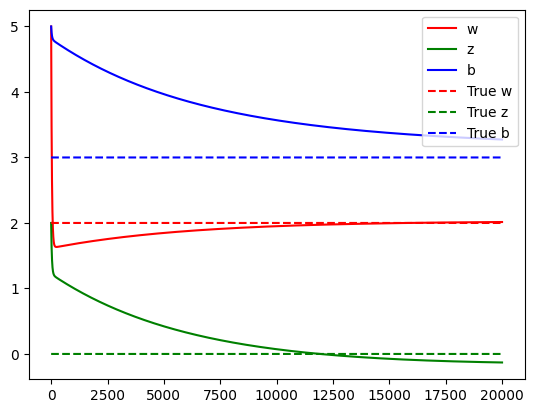

In [4]:
# Plottaggio risultati e confronto con valori reali
TRUE_w = 2.0
TRUE_z = 0.0
TRUE_b = 3.0
plt.plot(epochs, list_w, 'r', epochs, list_z, 'g', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_z] * len(epochs), 'g--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'z', 'b', 'True w', 'True z', 'True b'])
plt.show()